# __HY573 - Assignment 2__

In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')

## <u>__Exercise 1: Unconstrained Least Squares Regression__</u>

First, we perform EDA to gain a first understanding of the data:

In [2]:
h = pd.read_csv('housing.csv', header=None, delim_whitespace=True)
h

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
h.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Column 3 seems to be a binary 0-1 variable. Logistic regression would be a more appropriate model for this predictor, however we can still include it in our linear regression model.

Split the data into training and test set, in order to evaluate the performance of the following models.

In [4]:
X = h.iloc[:, :-1].values
y = h.iloc[:, -1].values

N, p = X.shape
n = int(N*0.7)
idx = np.arange(N)

np.random.seed(1)
train_idx = np.random.choice(idx, n, replace=False)
test_idx = np.setdiff1d(idx, train_idx)
X_test = X[test_idx]
y_test = y[test_idx]
X_train = X[train_idx, :]
y_train = y[train_idx]

First model: unconstrained least squares (multiple) regression (assume no intercept/bias term):

$$\hat{y} = x_1β_1 + x_2β_2 + ... + x_pβ_p = Xβ$$

We want to minimize the sum of squared residuals:

$$RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

It has a closed form solution given by:

$$β = (X^TX)^{-1}X^Ty$$

where:
- $X$ is the $n×p$ matrix of $n$ observations and $p$ predictors
- $y$ is the $n×1$ vector of the target variable
- $\hat{y}$ is the $n×1$ vector of the predicted target values
- $β$ is the $p×1$ vector of the regression coefficients

In [5]:
def least_squares(X, y):
    return la.inv(X.T @ X) @ X.T @ y

def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

RMSE on the test set: 5.69
Norm of the coefficients: 16.10


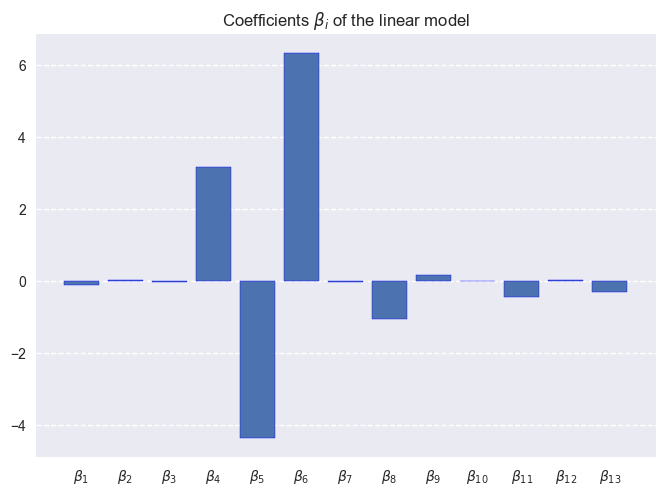

In [6]:
def plot_b(b, ax=None):
    if ax is None:
        ax = plt.gca()
    x = [f'$β_{{{i+1}}}$' for i in range(len(b))]
    ax.grid(False)
    ax.bar(np.arange(len(b)), b, tick_label=x, edgecolor='b')
    ax.set_title('Coefficients $β_i$ of the linear model')
    ax.grid(axis='y', linestyle='--')

b = least_squares(X_train, y_train)
y_pred = X_test @ b
error = rmse(y_test, y_pred)

print(f'RMSE on the test set: {error:.2f}')
print(f'Norm of the coefficients: {la.norm(b, 1):.2f}')
plot_b(b)

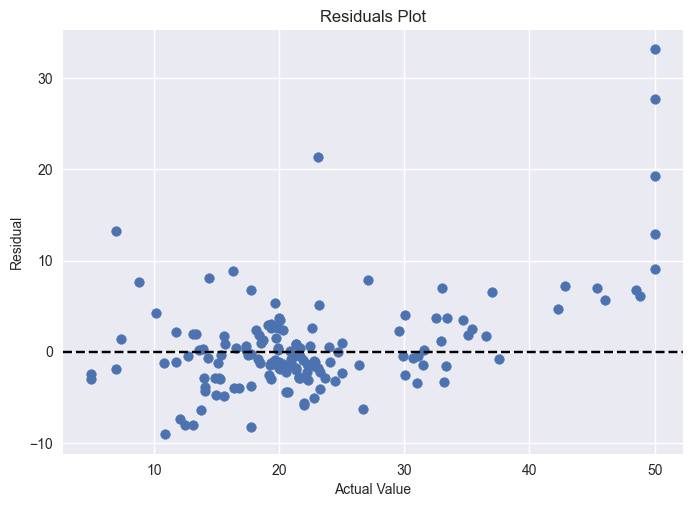

In [7]:
def residual_plot(y, y_pred, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(y, y - y_pred)
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel('Actual Value')
    ax.set_ylabel('Residual')
    ax.set_title('Residuals Plot')

residual_plot(y_test, y_pred)

## <u>__Exercise 2: Lasso Regression__</u>

Same linear model as before, but now we want to minimize the Lasso Loss:
$$
L(β) = \frac{1}{2n} \sum_{i=1}^n (y_i - \sum_{j=1}^p β_j X_{ij})^2 + λ \sum_{j=1}^p |β_j|
 = \frac{1}{2} \mathrm{MSE}(y, \hat{y}) + λ ||β||_1
$$
where:
- $\lambda$ is the regularization parameter
- $X, y, \hat{y}, β$ are same as before

$\mathrm{MSE}(y, \hat{y})$ is convex and differentiable everywhere, while $||β||_1$ is convex and differentiable everywhere except at $0$. We can use subgradient descent as follows:

$$
% \nabla L(β) = -\frac{1}{N} \sum_{i=1}^N (y_i - \sum_{j=1}^p β_j x_{ij}) x_{ij} + λ \mathrm{sgn}(β)
% \nabla L(β) = -\frac{1}{N} (y - βX)X + λ \mathrm{sgn}(β)
\nabla L(β) = -\frac{1}{N} (y - βX)X + λ \mathrm{S_λ}(β)
$$

where $\mathrm{S_λ}(x)$ is the soft-thresholding operator.

For this we can use coordinate descent, which is an iterative algorithm that at each iteration updates the value of one coordinate of $β$ while keeping the other coordinates fixed. Specifically for this task, there is a closed form of the coordinate descent update for the Lasso loss (source: [slides (p.12)](https://www.cs.cmu.edu/~ggordon/10725-F12/slides/25-coord-desc.pdf), [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2929880/)):

$$
β_i^{new} = \mathrm{S_{λ/||X_i||^2}}(\frac{X_i^T (y-X_{-i}β_{-i})}{X_i^T X_i})
$$
repeated for $i=1,2,...,p,1,2,...$

$x_{-i}$ denotes vector $x$ without the $i$-th element, so $y-X_{-i}β_{-i}$ will be the current residuals wrt. all but the $i$-th predictor, or in other words the coordinate direction wrt. $i$

In [8]:
# closed form coordinate descent

def lasso_regression(X, y, λ=1, n_iters=1000, tol=1e-2):
    n, p = X.shape
    λ = λ * n
    # b = np.zeros(p)
    # b = np.random.randn(p)
    b = least_squares(X, y)

    def soft_threshold(x, s=λ):
        return np.sign(x) * np.max(np.abs(x) - s, 0)

    # residuals wrt predictors -i for weight vector x
    def r(x, i):
        not_i = np.ones(p, dtype=bool)
        not_i[i] = False
        return ((y - X[:, not_i] @ x[not_i]) @ X[:, i]) / (X[:, i].T @ X[:, i])

    for i in range(n_iters):
        for k in range(p):
            # if a predictor is already ~0, skip update on that predictor
            if np.allclose(b[k], 0, atol=tol):
                continue

            next_k = r(b, k)

            Xk_norm = np.square(X[:, k]).sum()

            b[k] = soft_threshold(next_k, λ / Xk_norm)

    return b

In [9]:
def tune_lasso(X_train, y_train, X_test, y_test, steps=np.logspace(-3, 1, 15)):
    best_λ = 0
    best_error = np.inf
    best_b = None

    # search for best λ between 10^-3 and 10^1 (if it falls in the edges, change the range)
    for λ in np.logspace(-3, 1, 15):
        b_lasso = lasso_regression(X_train, y_train, λ, 500)
        y_pred_lasso = X_test @ b_lasso
        error = rmse(y_test, y_pred_lasso)
        if error < best_error:
            best_error = error
            best_λ = λ
            best_b = b_lasso

    return best_λ, best_b

Best λ: 1.00e-01
RMSE on test set: 5.66
Norm of b: 9.64


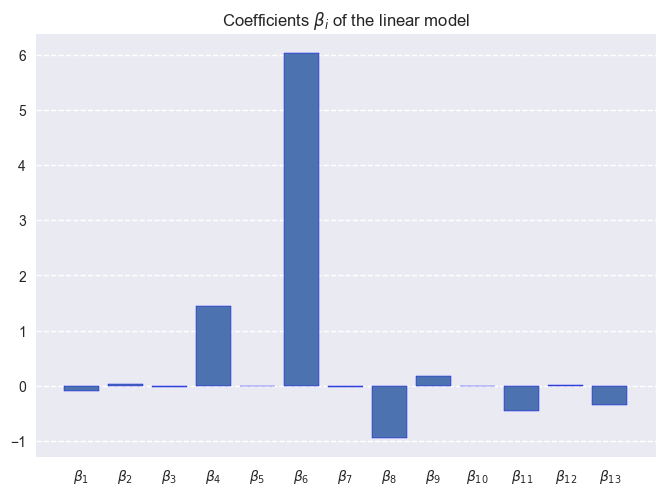

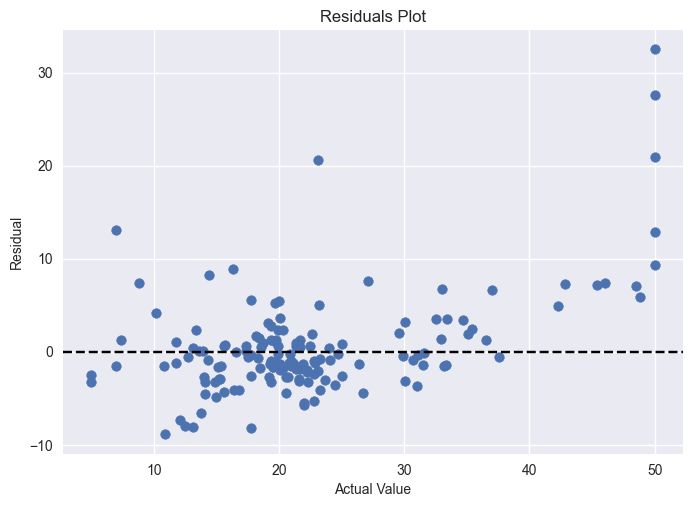

In [10]:
best_λ, b_lasso = tune_lasso(X_train, y_train, X_test, y_test)
y_pred_lasso = X_test @ b_lasso
error_lasso = rmse(y_test, y_pred_lasso)

print(f'Best λ: {best_λ:.2e}')
print(f'RMSE on test set: {error_lasso:.2f}')
print(f'Norm of b: {la.norm(b_lasso, 1):.2f}')
plot_b(b_lasso)
plt.figure()
residual_plot(y_test, y_pred_lasso)

We can see that the RMSE is lower than in the ordinary Least Squares Regression (OLS), even if the difference is small (5.66 vs. 5.69). This is because the Lasso Regression imporoves generalization by producing a simpler model, since it tries to force (more) coefficients to be zero, thus reducing the number of predictors. We can confirm that by looking at their coefficient plots side by side:

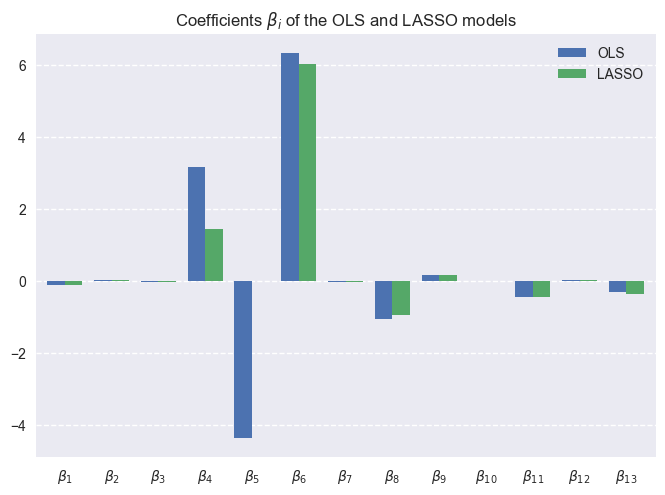

In [11]:
ax = plt.gca()
x = [f'$β_{{{i+1}}}$' for i in range(len(b))]
d = pd.DataFrame({'OLS': b, 'LASSO': b_lasso}, index=x)
d.plot.bar(ax=ax, rot=0, width=0.75)
ax.grid(False)
ax.grid(axis='y', linestyle='--')
plt.setp(ax.patches, linewidth=0)
ax.set_title('Coefficients $β_i$ of the OLS and LASSO models')
plt.show()

We can see that the Lasso Regression has forced $β_5$ to be zero, while other coefficients such as $β_4$ and $β_6$ have shrunk to varying degrees.

## <u>__Exercise 3: Handling Missing Data__</u>
Here we'll introduce missing values in the data to varying levels: 20%, 33%, 50%, 66%, 75% and compare the performance of the same 2 models between them and to the baseline.

In [12]:
steps = [0, 0.2, 1/3, 1/2, 2/3, 3/4]
X_miss_n = {0: X}
B = {}
errors_miss = {0: (rmse(y_test, y_pred), rmse(y_test, y_pred_lasso))}

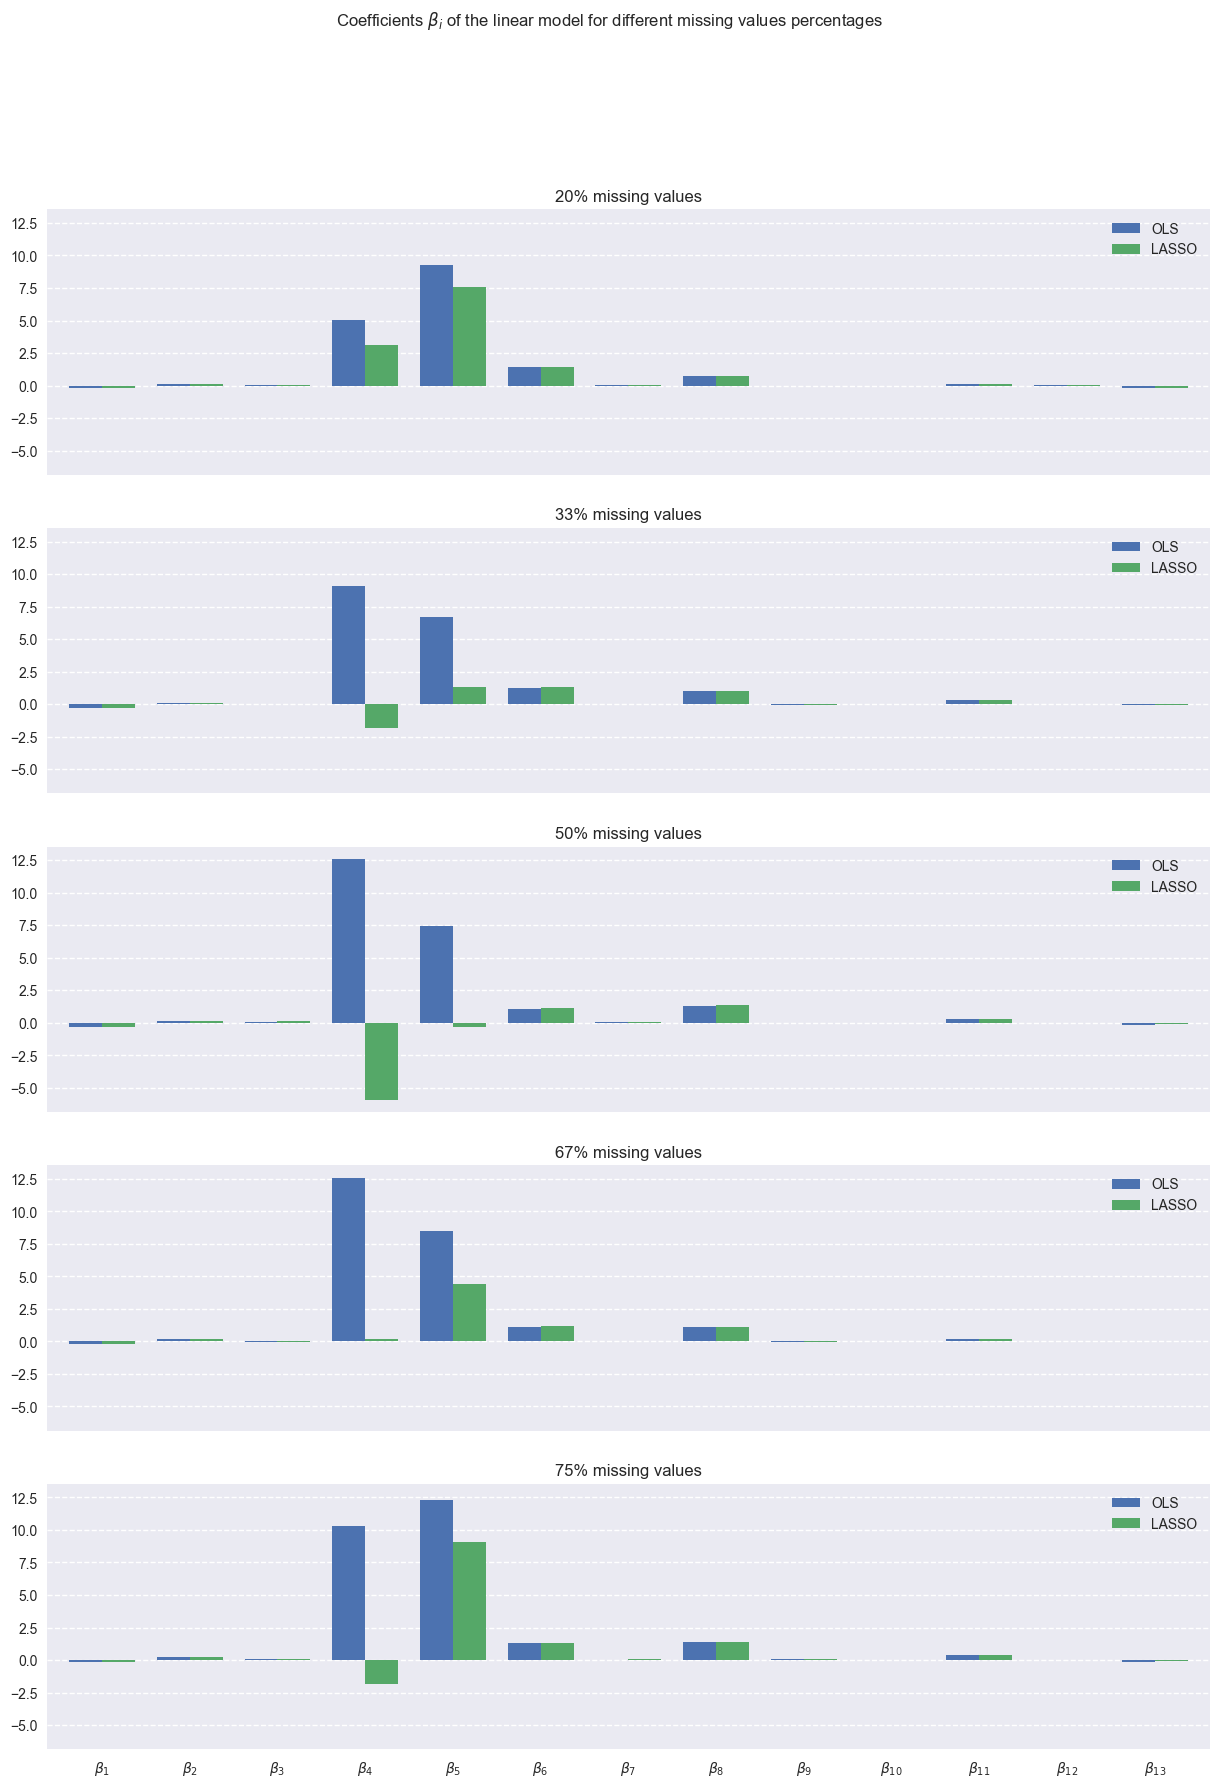

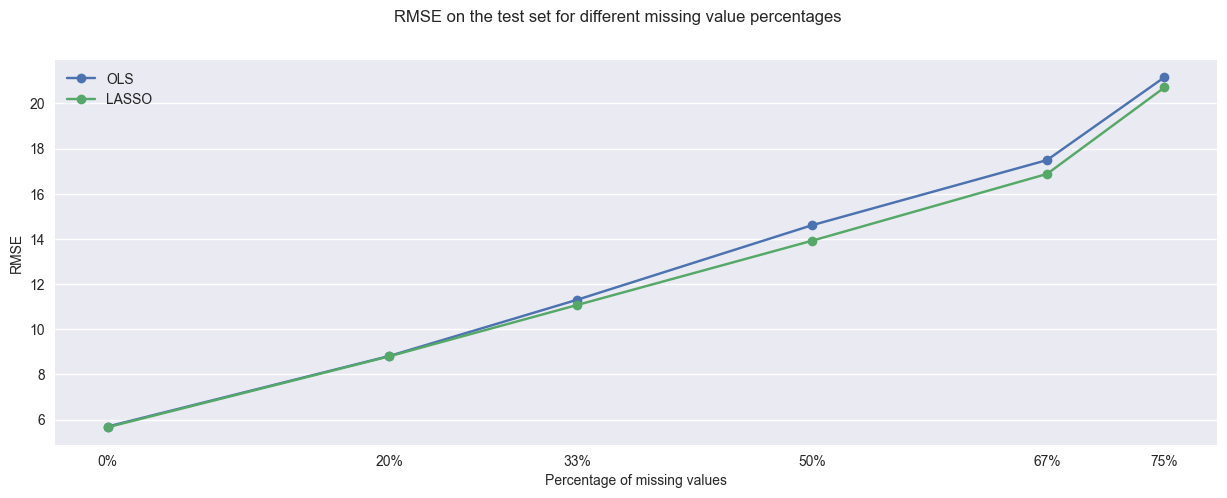

In [13]:
fig, axs = plt.subplots(len(steps)-1, figsize=(15, 20), sharex=True, sharey=True)
fig.suptitle('Coefficients $β_i$ of the linear model for different missing values percentages')

for i, perc in enumerate(steps[1:]):
    X_miss = X.copy()

    # set perc percentage of values in miss to 0 (we can't work with NaN)
    num_values = int(perc * X_miss.size)
    np.random.seed(0)   # for fair comparison
    rows = np.random.choice(X_miss.shape[0], num_values)
    cols = np.random.choice(X_miss.shape[1], num_values)
    for r, c in zip(rows, cols):
        X_miss[r, c] = 0

    X_miss_n[perc] = X_miss

    X_miss_train = X_miss[train_idx]
    X_miss_test = X_miss[test_idx]

    # evaluate the models
    b_miss = least_squares(X_miss_train, y_train)
    y_miss_pred = X_test @ b_miss
    error_ols_miss = rmse(y_test, y_miss_pred)

    best_λ, b_lasso_miss = tune_lasso(X_miss_train, y_train, X_test, y_test)
    y_miss_pred = X_test @ b_lasso_miss
    error_lasso_miss = rmse(y_test, y_miss_pred)

    # plot coefficients
    x = [f'$β_{{{i+1}}}$' for i in range(len(b))]
    d = pd.DataFrame({'OLS': b_miss, 'LASSO': b_lasso_miss}, index=x)
    d.plot.bar(ax=axs[i], rot=0, width=0.75)
    axs[i].set_title(f'{perc*100:.0f}% missing values')
    axs[i].grid(False)
    axs[i].grid(axis='y', linestyle='--')
    plt.setp(axs[i].patches, linewidth=0)

    B[perc] = (b_miss, b_lasso_miss)
    errors_miss[perc] = (error_ols_miss, error_lasso_miss)

# plot RMSE
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('RMSE on the test set for different missing value percentages')
ax.plot(steps, [e[0] for e in errors_miss.values()], marker='o', label='OLS')
ax.plot(steps, [e[1] for e in errors_miss.values()], marker='o', label='LASSO')
ax.grid(axis='x')
ax.set_xlabel('Percentage of missing values')
ax.set_ylabel('RMSE')
ax.set_xticks(steps)
ax.set_xticklabels([f'{s*100:.0f}%' for s in steps])
ax.legend()
plt.show()

We can first see that the coefficients for the LASSO model are indeed generally smaller in magnitude, however there are only rare cases that it manages to force a coefficient to (about) zero. Furthermore, another result is that the RMSE for both models generally increases as the percentage of missing values increases, which is expected, while the RMSE for LASSO is generally lower than the OLS.

## <u>__Exercise 4: Matrix Completion__</u>
Nuclear norm $||X||_*$ is the sum of the singular values of $X$, also known as trace (norm):
$$||X||_* = \sum_{i=1}^{r} σ_i(X)$$
where $σ_i(X)$ are the singular values of $X$ and $r$ is the rank of $X$.

The matrix completion problem can be formulated as:
$$
\min_{Y} \frac{1}{2} \sum_{(i, j) \in Ω}(X_{ij} - B_{ij}) + λ ||Y||_*
$$
where $Ω$ is the set of observed entries of $X$, the incomplete matrix and $Y$ is the completed matrix.
Using the projection operator $P_Ω(X)$, defined as:
$$
P_Ω(X)_{ij} = \begin{cases}
X_{ij} & \text{if } (i, j) \in Ω \\
0 & \text{otherwise}
\end{cases}
$$
we can rewrite the problem as:
$$
\min_{Y} \frac{1}{2} ||P_Ω(X) - P_Ω(Y)||_F^2 + λ ||Y||_*
$$
where $||.||_F$ is the Frobenius norm.

This can be solved using proximal gradient descent, with the following update rule:
$$
Y^{(k+1)} = \mathrm{S_{λ}}(P_Ω(X) + P_{Ω^c}(Y^{(k)}))
$$
where:
- $\mathrm{S_λ}(X)$ is the Singular Value Thresholding algorithm as presented [here](https://arxiv.org/pdf/0810.3286.pdf) (and [here](https://elearn.uoc.gr/pluginfile.php/331519/mod_resource/content/2/CS573_Lecture18_Final.pdf)), basically applies soft-thresholding to the singular values of $X$, after performing SVD.
- $P_{Ω^c}(Y^{(k)})$ is the projection of $Y^{(k)}$ onto the complement of $Ω$ (the unobserved set).

In [ ]:
def nuclear_norm_minimization(X, unk_idx, λ=1, max_iter=100, tol=1e-4):
    # X: incomplete matrix
    # unk_idx: indices of the unknown values in X
    # λ: soft-thresholding parameter

    def soft_threshold(x):
        return np.sign(x) * np.maximum(np.abs(x) - λ, 0)

    # Singular Value Thresholding
    def SVT(X):
        U, S, Vt = la.svd(X, full_matrices=False)
        S = soft_threshold(S)
        return U @ np.diag(S) @ Vt

    Y = X.copy()
    for _ in range(max_iter):
        # A is X for the known values, Y for the unknown values
        A = X.copy()
        for i in unk_idx:
            A[i] = Y[i]

        Y = SVT(A)
        if la.norm(X - Y) / la.norm(X) < tol:
            break

    return Y

In [15]:
# use 50% level of missing values to demonstrate first
perc = 0.5
X_miss50 = X_miss_n[perc]
num_values = int(perc * X_miss.size)
np.random.seed(0)   # because of this the indices are the same as before
rows = np.random.choice(X_miss.shape[0], num_values)
cols = np.random.choice(X_miss.shape[1], num_values)

compl = nuclear_norm_minimization(X_miss50, zip(rows, cols), 0.5)

diff = la.norm(X - compl) / la.norm(X)
print(f'Difference between X and completed matrix ({perc*100}% missing values): {diff:.2f}')

Difference between X and completed matrix (50.0% missing values): 0.62


The result is that our completed matrix has a modest 0.62 difference to the original matrix, computed as $\frac{||\hat{X} - X||_F}{||X||_F}$. We can expect that the more missing values we have, the worse the performance of the algorithm will be, since it will have less information to work with.

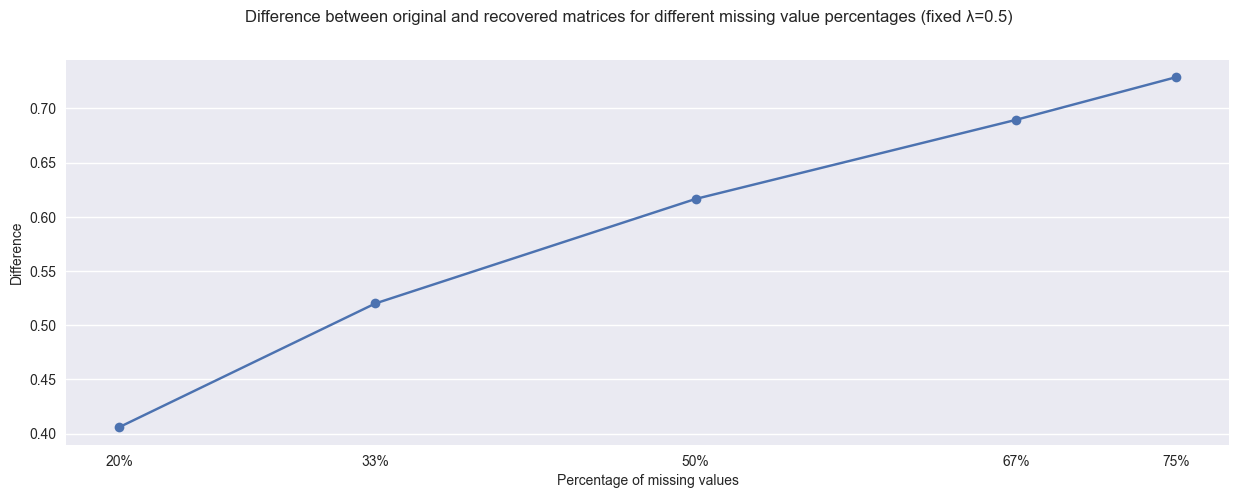

In [16]:
# compare for all missing values levels
compl = {}
diff = {}

for perc in steps[1:]:
    X_miss = X_miss_n[perc]
    num_values = int(perc * X_miss.size)
    np.random.seed(0)
    rows = np.random.choice(X_miss.shape[0], num_values)
    cols = np.random.choice(X_miss.shape[1], num_values)

    compl[perc] = nuclear_norm_minimization(X_miss, zip(rows, cols), 0.5)
    diff[perc] = la.norm(X - compl[perc]) / la.norm(X)

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Difference between original and recovered matrices for different missing value percentages (fixed λ=0.5)')
ax.plot(steps[1:], diff.values(), marker='o')
ax.grid(axis='x')
ax.set_xlabel('Percentage of missing values')
ax.set_ylabel('Difference')
ax.set_xticks(steps[1:])
ax.set_xticklabels([f'{s*100:.0f}%' for s in steps[1:]])
plt.show()

Just as mentioned above, the more missing values, the greater the difference between the completed matrix and the original one. Based on these values, we can expect that the performance of the regression models is going to be quite worse on the recovered matrices compared to the original ones, which is to be expected after all.

## <u>__Exercise 5: Re-evaluation Using the Completed Dataset__</u>
Let's now compare the performance of the regression models between the original data and our reconstructed matrix of the partially observed data.

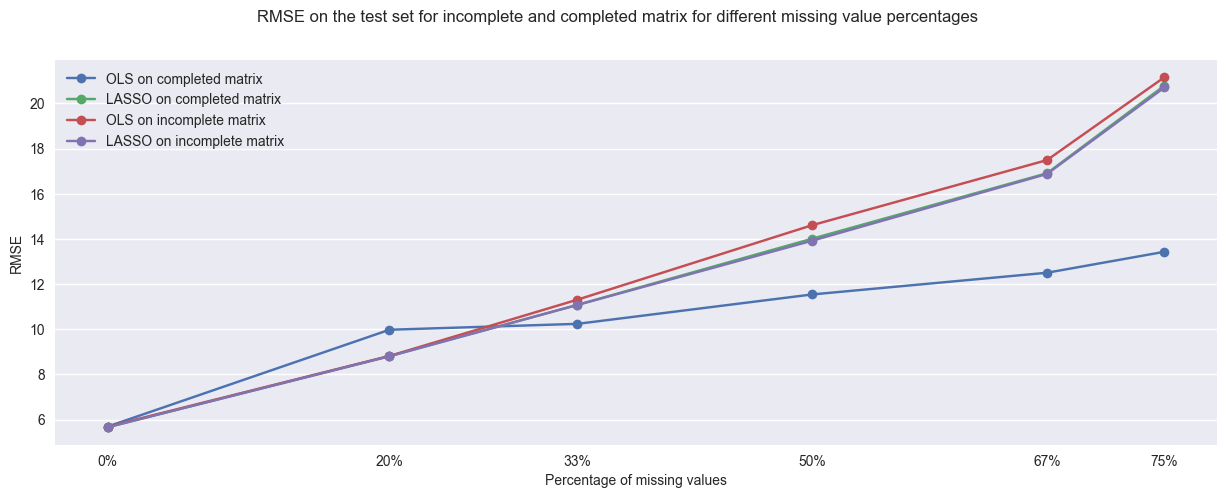

In [17]:
# compare lasso and ols on the original and completed matrix for all missing values levels
errors_compl = {0: (error, error_lasso)}

for perc in steps[1:]:
    compl_train = compl[perc][train_idx]
    compl_test = compl[perc][test_idx]

    # evaluate the models on completed matrix
    b_compl = least_squares(compl_train, y_train)
    y_pred_compl = compl_test @ b_compl
    error_ols_compl = rmse(y_test, y_pred_compl)

    best_λ, b_compl_lasso = tune_lasso(compl_train, y_train, X_test, y_test)
    y_pred_compl_lasso = X_test @ b_compl_lasso
    error_lasso_compl = rmse(y_test, y_pred_compl_lasso)

    errors_compl[perc] = (error_ols_compl, error_lasso_compl)

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('RMSE on the test set for incomplete and completed matrix for different missing value percentages')
ax.plot(steps, [e[0] for e in errors_compl.values()], marker='o', label='OLS on completed matrix')
ax.plot(steps, [e[1] for e in errors_compl.values()], marker='o', label='LASSO on completed matrix')
ax.plot(steps, [e[0] for e in errors_miss.values()], marker='o', label='OLS on incomplete matrix')
ax.plot(steps, [e[1] for e in errors_miss.values()], marker='o', label='LASSO on incomplete matrix')
ax.grid(axis='x')
ax.set_xlabel('Percentage of missing values')
ax.set_ylabel('RMSE')
ax.set_xticks(steps)
ax.set_xticklabels([f'{s*100:.0f}%' for s in steps])
ax.legend()
plt.show()

We can see that genarally the performance of the regression models on the completed matrices is clearly better than on the incomplete matrices, except for the 20% level. Still, they're quite worse than on the original matrix (0% level), which is to be expected. However, curiously, the LASSO doesn't seem to improve performance any further.